<a href="https://colab.research.google.com/github/NidhiSaini1/Gesture_Recognition/blob/main/Comehere_data_trim_filtered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving circledata1_N.csv to circledata1_N (1).csv
Saving circleset2_N.csv to circleset2_N (1).csv
Saving circleset3_N.csv to circleset3_N (1).csv
Processing file: circledata1_N (1).csv
Lines before trimming for circledata1_N (1).csv: 2669
Lines before trimming: 2669
Lines after trimming: 1860


<ipython-input-3-15d631edfae6>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['Filtered Accel X'] = butter_lowpass_filter(trimmed_data['Linear Acceleration x (m/s^2)'],
<ipython-input-3-15d631edfae6>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['Filtered Accel Y'] = butter_lowpass_filter(trimmed_data['Linear Acceleration y (m/s^2)'],
<ipython-input-3-15d631edfae6>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

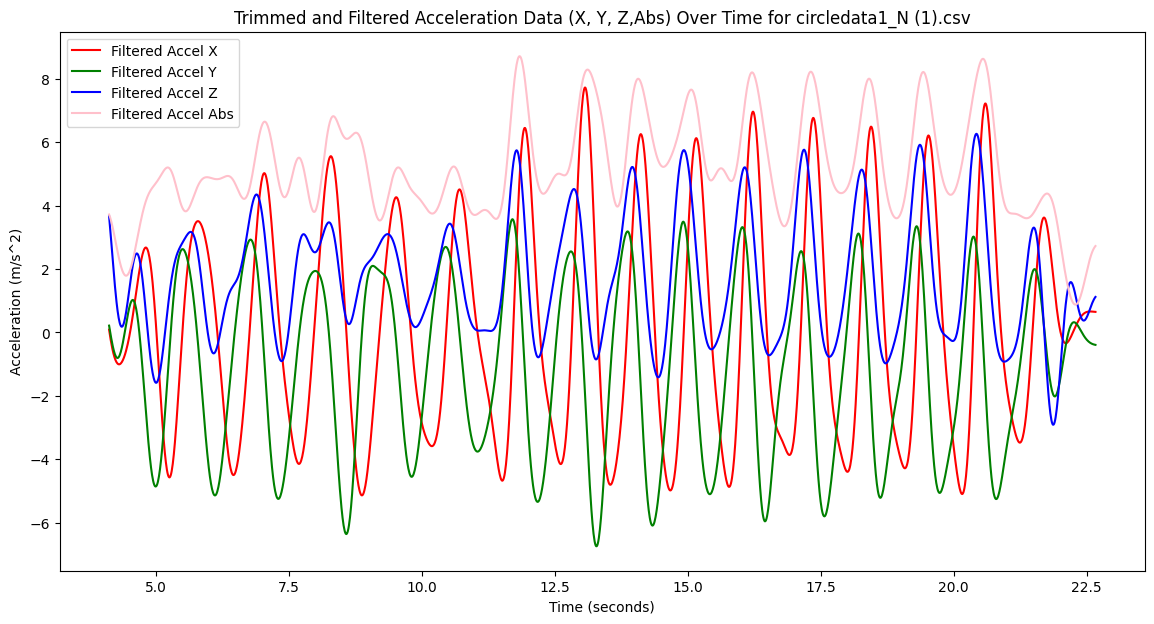

Processing file: circleset2_N (1).csv
Lines before trimming for circleset2_N (1).csv: 2754
Lines before trimming: 2754
Lines after trimming: 1935


<ipython-input-3-15d631edfae6>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['Filtered Accel X'] = butter_lowpass_filter(trimmed_data['Linear Acceleration x (m/s^2)'],
<ipython-input-3-15d631edfae6>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['Filtered Accel Y'] = butter_lowpass_filter(trimmed_data['Linear Acceleration y (m/s^2)'],
<ipython-input-3-15d631edfae6>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

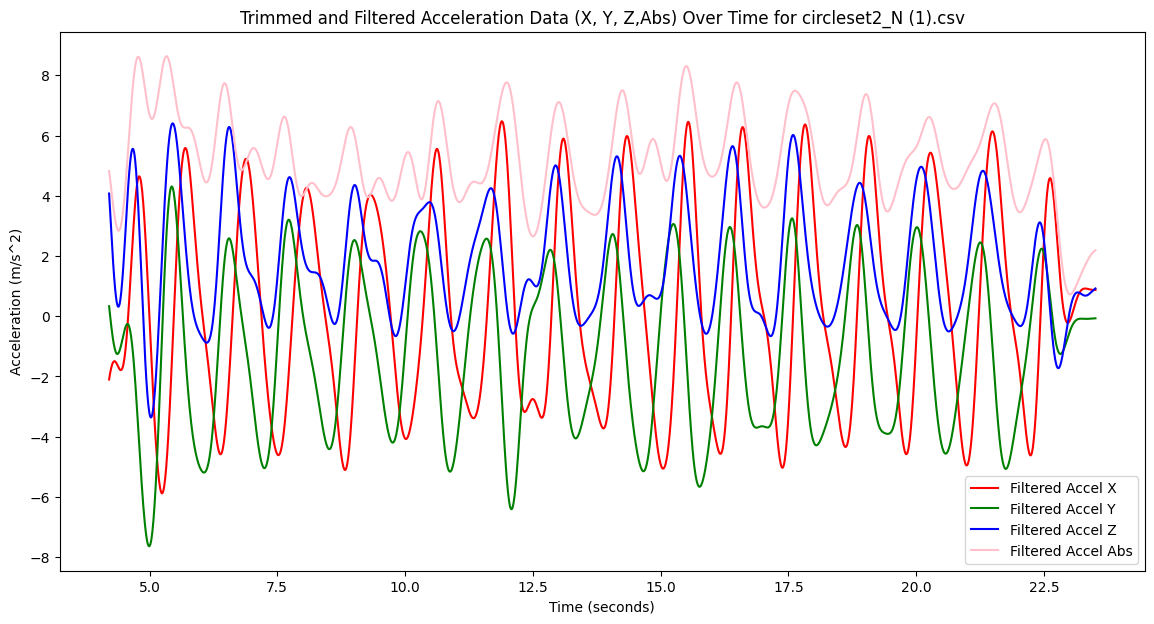

Processing file: circleset3_N (1).csv
Lines before trimming for circleset3_N (1).csv: 2672
Lines before trimming: 2672
Lines after trimming: 1804


<ipython-input-3-15d631edfae6>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['Filtered Accel X'] = butter_lowpass_filter(trimmed_data['Linear Acceleration x (m/s^2)'],
<ipython-input-3-15d631edfae6>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['Filtered Accel Y'] = butter_lowpass_filter(trimmed_data['Linear Acceleration y (m/s^2)'],
<ipython-input-3-15d631edfae6>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

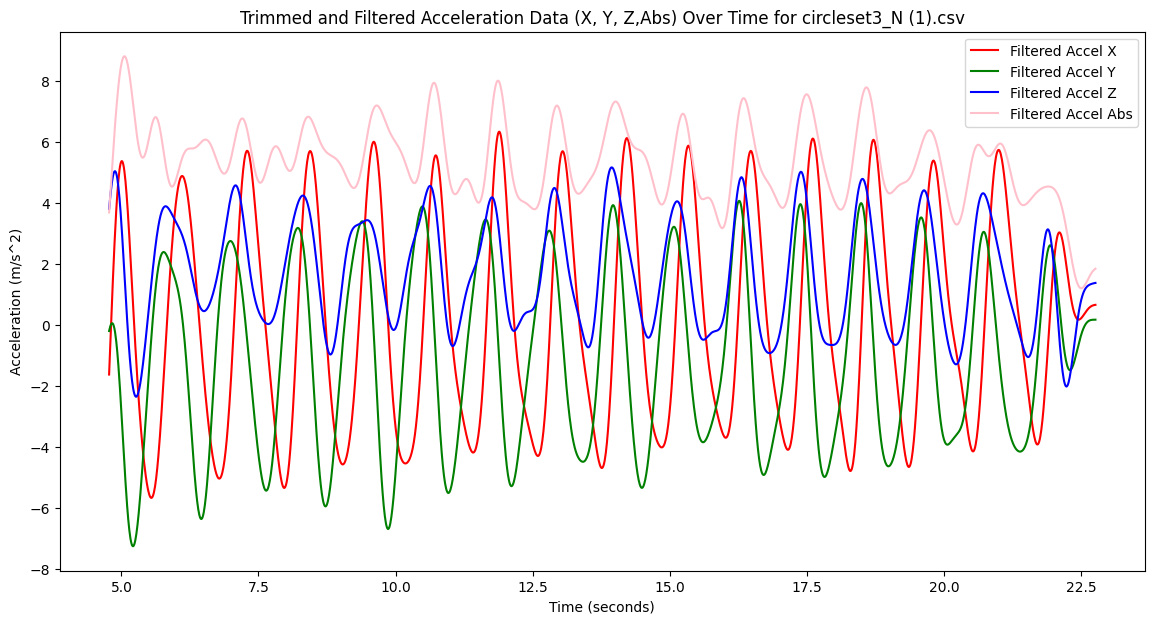

In [3]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io
from scipy.signal import butter, filtfilt

# Butterworth Filter implementation
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

def trim_and_filter_save_data(data, file_name):
    # Print lines before trimming
    lines_before_trim = data.shape[0]
    print(f'Lines before trimming for {file_name}: {lines_before_trim}')

    # Define your filter parameters
    cutoff_frequency = 2 # Set your desired cutoff frequency, e.g., 3Hz
    sampling_rate = 100  # Set the sampling rate of your data

    # Assume the thresholds and trimming process is the same as before
    # ...
    # trimmed_data is the result after trimming

    # Load the data from the CSV file
    data = pd.read_csv(file_name)

    # Print lines before trimming
    lines_before_trim = data.shape[0]
    print(f'Lines before trimming: {lines_before_trim}')

    # Define thresholds for trimming based on standard deviation above mean for each axis
    x_threshold = data['Linear Acceleration x (m/s^2)'].mean() + data['Linear Acceleration x (m/s^2)'].std()
    y_threshold = data['Linear Acceleration y (m/s^2)'].mean() + data['Linear Acceleration y (m/s^2)'].std()
    z_threshold = data['Linear Acceleration z (m/s^2)'].mean() + data['Linear Acceleration z (m/s^2)'].std()
    abs_threshold = data['Absolute acceleration (m/s^2)'].mean() + data['Absolute acceleration (m/s^2)'].std()

    # Find indices for trimming based on thresholds for each axis
    start_index_x = data[data['Linear Acceleration x (m/s^2)'] > x_threshold].index[0]
    end_index_x = data[data['Linear Acceleration x (m/s^2)'] > x_threshold].index[-1]
    start_index_y = data[data['Linear Acceleration y (m/s^2)'] > y_threshold].index[0]
    end_index_y = data[data['Linear Acceleration y (m/s^2)'] > y_threshold].index[-1]
    start_index_z = data[data['Linear Acceleration z (m/s^2)'] > z_threshold].index[0]
    end_index_z = data[data['Linear Acceleration z (m/s^2)'] > z_threshold].index[-1]
    start_index_abs = data[data['Absolute acceleration (m/s^2)'] > abs_threshold].index[0]
    end_index_abs = data[data['Absolute acceleration (m/s^2)'] > abs_threshold].index[-1]

    # Determine the overall start and end index
    overall_start = min(start_index_x, start_index_y, start_index_z,start_index_abs)
    overall_end = max(end_index_x, end_index_y, end_index_z,end_index_abs)

    # Trim the data based on the overall indices to include all relevant gesture data
    trimmed_data = data.loc[overall_start:overall_end]

    # Print lines after trimming
    lines_after_trim = trimmed_data.shape[0]
    print(f'Lines after trimming: {lines_after_trim}')

    # Now apply the filter to each axis of acceleration data
    trimmed_data['Filtered Accel X'] = butter_lowpass_filter(trimmed_data['Linear Acceleration x (m/s^2)'],
                                                             cutoff_frequency, sampling_rate)
    trimmed_data['Filtered Accel Y'] = butter_lowpass_filter(trimmed_data['Linear Acceleration y (m/s^2)'],
                                                             cutoff_frequency, sampling_rate)
    trimmed_data['Filtered Accel Z'] = butter_lowpass_filter(trimmed_data['Linear Acceleration z (m/s^2)'],
                                                             cutoff_frequency, sampling_rate)
    trimmed_data['Filtered Accel Abs'] = butter_lowpass_filter(trimmed_data['Absolute acceleration (m/s^2)'],
                                                             cutoff_frequency, sampling_rate)

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(trimmed_data['Time (s)'], trimmed_data['Filtered Accel X'], label='Filtered Accel X', linestyle='-', color='r')
    plt.plot(trimmed_data['Time (s)'], trimmed_data['Filtered Accel Y'], label='Filtered Accel Y', linestyle='-', color='g')
    plt.plot(trimmed_data['Time (s)'], trimmed_data['Filtered Accel Z'], label='Filtered Accel Z', linestyle='-', color='b')
    plt.plot(trimmed_data['Time (s)'], trimmed_data['Filtered Accel Abs'], label='Filtered Accel Abs', linestyle='-', color='pink')
    plt.title(f'Trimmed and Filtered Acceleration Data (X, Y, Z,Abs) Over Time for {file_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.legend()
    plt.show()

    # Save the trimmed and filtered data to a new CSV file and download it
    filtered_trimmed_file_path = f'filtered_trimmed_{file_name}'
    # trimmed_data.to_csv(filtered_trimmed_file_path, index=False)
    # files.download(filtered_trimmed_file_path)

    return filtered_trimmed_file_path

# Upload the CSV files
uploaded = files.upload()

# Process each file
for file_name, data in uploaded.items():
    print(f"Processing file: {file_name}")
    data_df = pd.read_csv(io.BytesIO(data))
    trimmed_file_path = trim_and_filter_save_data(data_df, file_name)


Saving Comehere1_N.csv to Comehere1_N (2).csv
Saving Comehere2_N.csv to Comehere2_N (2).csv
Saving Comehere3_N.csv to Comehere3_N (2).csv
Saving ComeHereA2.csv to ComeHereA2 (2).csv
Saving ComeHereA3.csv to ComeHereA3 (2).csv
Saving Raw Data_comehere_1_G.csv to Raw Data_comehere_1_G (2).csv
Saving Raw Data_comehere_2_G.csv to Raw Data_comehere_2_G (2).csv
Saving Raw Data_comehere_3_G.csv to Raw Data_comehere_3_G (2).csv
Processing file: Comehere1_N (2).csv
Processing file: Comehere2_N (2).csv
Processing file: Comehere3_N (2).csv
Processing file: ComeHereA2 (2).csv
Processing file: ComeHereA3 (2).csv
Processing file: Raw Data_comehere_1_G (2).csv
Processing file: Raw Data_comehere_2_G (2).csv
Processing file: Raw Data_comehere_3_G (2).csv


<ipython-input-6-379ad5211add>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data[filtered_column_name] = butter_lowpass_filter(trimmed_data[column], cutoff_frequency, sampling_rate)
<ipython-input-6-379ad5211add>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data[filtered_column_name] = butter_lowpass_filter(trimmed_data[column], cutoff_frequency, sampling_rate)
<ipython-input-6-379ad5211add>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

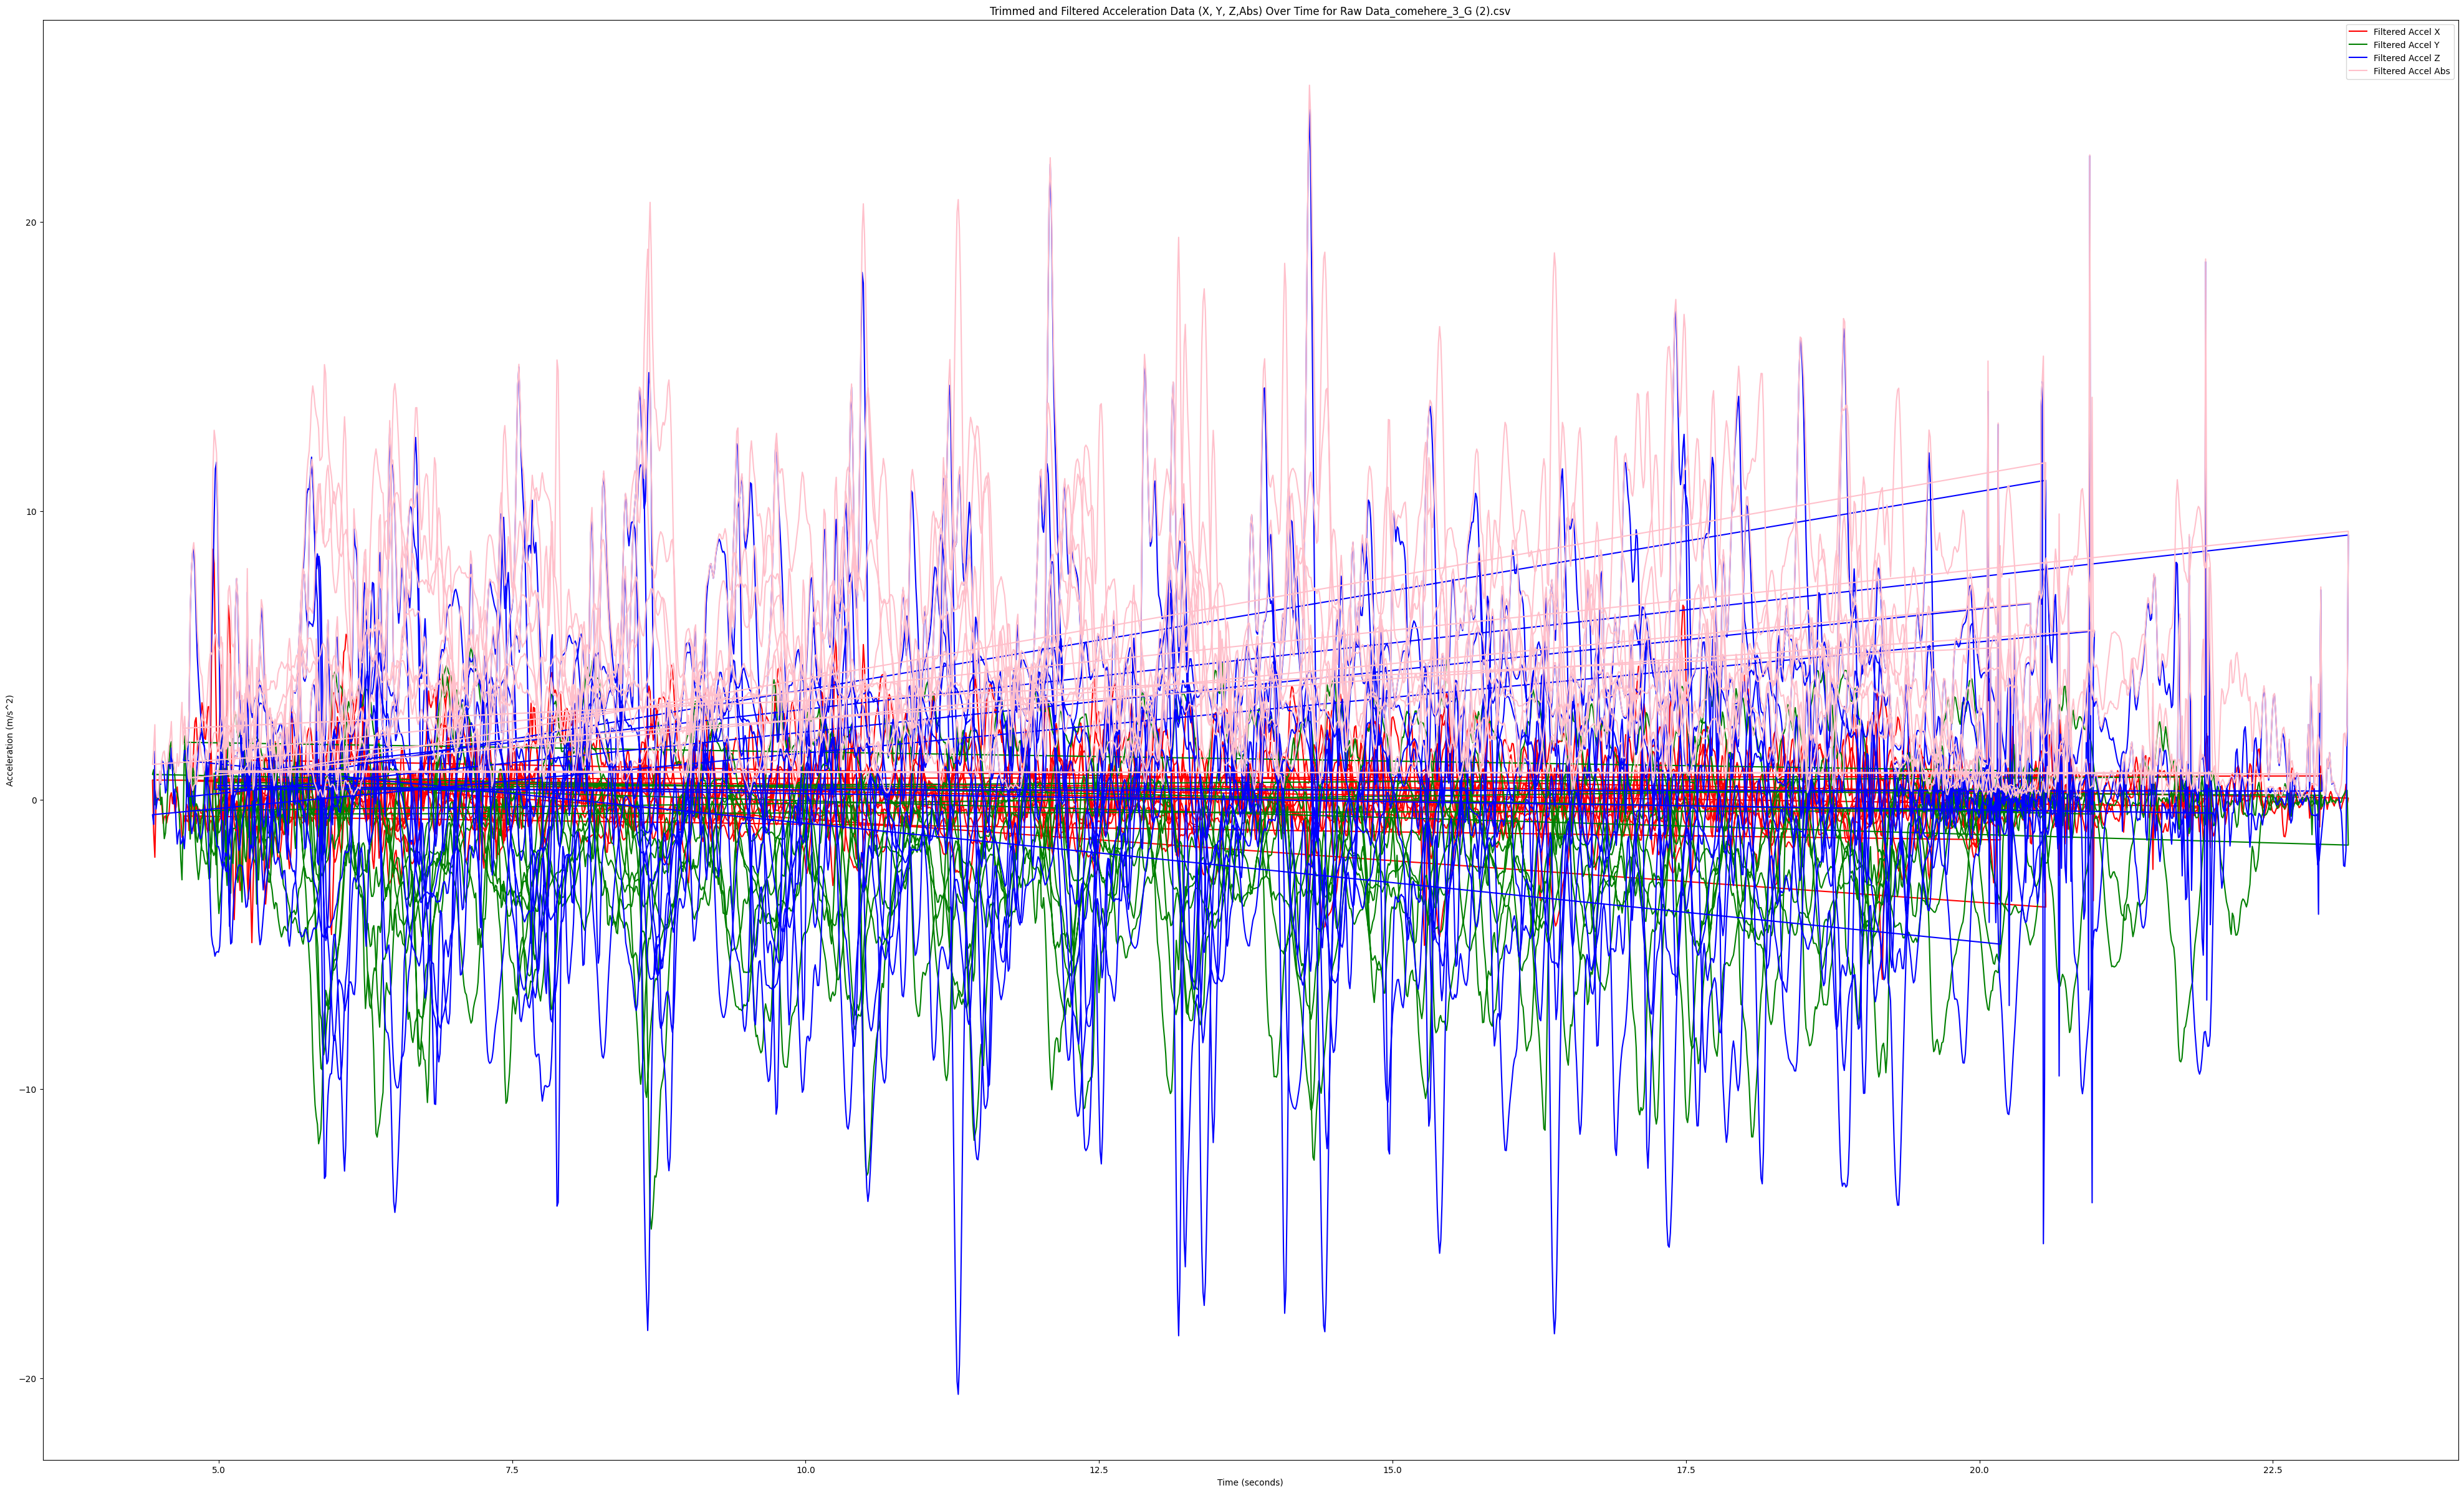

In [6]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io
from scipy.signal import butter, filtfilt

# Butterworth Filter implementation
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

def trim_and_filter_data(data, cutoff_frequency=2, sampling_rate=100):
    # Define thresholds for trimming based on standard deviation above mean
    thresholds = {
        'Linear Acceleration x (m/s^2)': data['Linear Acceleration x (m/s^2)'].mean() + data['Linear Acceleration x (m/s^2)'].std(),
        'Linear Acceleration y (m/s^2)': data['Linear Acceleration y (m/s^2)'].mean() + data['Linear Acceleration y (m/s^2)'].std(),
        'Linear Acceleration z (m/s^2)': data['Linear Acceleration z (m/s^2)'].mean() + data['Linear Acceleration z (m/s^2)'].std(),
        'Absolute acceleration (m/s^2)': data['Absolute acceleration (m/s^2)'].mean() + data['Absolute acceleration (m/s^2)'].std()
    }

    start_indices = {column: data[data[column] > threshold].index[0] for column, threshold in thresholds.items()}
    end_indices = {column: data[data[column] > threshold].index[-1] for column, threshold in thresholds.items()}

    # Determine the overall start and end index
    overall_start = min(start_indices.values())
    overall_end = max(end_indices.values())

    # Trim the data based on the overall indices
    trimmed_data = data.loc[overall_start:overall_end]

    # Apply the filter to each axis of acceleration data and create new columns
    for column in thresholds:
        filtered_column_name = 'Filtered ' + column
        trimmed_data[filtered_column_name] = butter_lowpass_filter(trimmed_data[column], cutoff_frequency, sampling_rate)

    return trimmed_data

# Upload the CSV files
uploaded = files.upload()

# Process each file and store the results
all_filtered_data = []
for file_name, data in uploaded.items():
    print(f"Processing file: {file_name}")
    data_df = pd.read_csv(io.BytesIO(data))
    filtered_data = trim_and_filter_data(data_df)
    all_filtered_data.append(filtered_data)

# Merge all filtered dataframes
combined_filtered_data = pd.concat(all_filtered_data, ignore_index=True)

# Plotting the combined data
plt.figure(figsize=(50, 30))
plt.plot(combined_filtered_data['Time (s)'], combined_filtered_data['Linear Acceleration x (m/s^2)'], label='Filtered Accel X', linestyle='-', color='r')
plt.plot(combined_filtered_data['Time (s)'], combined_filtered_data['Linear Acceleration y (m/s^2)'], label='Filtered Accel Y', linestyle='-', color='g')
plt.plot(combined_filtered_data['Time (s)'], combined_filtered_data['Linear Acceleration z (m/s^2)'], label='Filtered Accel Z', linestyle='-', color='b')
plt.plot(combined_filtered_data['Time (s)'], combined_filtered_data['Absolute acceleration (m/s^2)'], label='Filtered Accel Abs', linestyle='-', color='pink')
plt.title(f'Trimmed and Filtered Acceleration Data (X, Y, Z,Abs) Over Time for {file_name}')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()
